In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
import os
path = "/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Train/Date"
df = []
for file in os.listdir(path):
    if file==".DS_Store":
        continue
    full_path = os.path.join(path,file)
    t = pd.read_csv(full_path, index_col=0)
    df.append(t)

In [3]:
#changing the data type of the date_time column from object to datetime
for d in df:
    d['time'] = pd.to_datetime(d['time']).dt.floor('T').dt.time

In [4]:
print(df[0])

            date      time  cgm  bas  bol  meal_carb meal_type  ex
6744  2021-10-09  00:00:00  123    0  0.0          0      None   0
6745  2021-10-09  00:05:00  124    0  0.0          0      None   0
6746  2021-10-09  00:10:00  125    0  0.0          0      None   0
6747  2021-10-09  00:15:00  121    0  0.0          0      None   0
6748  2021-10-09  00:20:00  121    0  0.0          0      None   0
...          ...       ...  ...  ...  ...        ...       ...  ..
7027  2021-10-09  23:35:00  117    0  0.0          0      None   0
7028  2021-10-09  23:40:00  111    0  0.0          0      None   0
7029  2021-10-09  23:45:00  106    0  0.0          0      None   0
7030  2021-10-09  23:50:00  105    0  0.0          0      None   0
7031  2021-10-09  23:55:00  102    0  0.0          0      None   0

[288 rows x 8 columns]


In [5]:
#LSTM model to predict the glucose level
#look_back = 1

model1 = Sequential()

model1.add(LSTM(units=100, return_sequences=True, input_shape=(1, 1)))
model1.add(Dropout(0.2))

model1.add(LSTM(units=14, return_sequences=True))


model1.add(LSTM(units=60, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(Dense(units = 1))
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

for i in range(150):
    print(f'Epoch - {i}')
    for d in df:
        p = d.iloc[:-1,2]
        q = d.iloc[1:, 2]
        model1.fit(p, q, epochs = 1, batch_size = 64)

Epoch - 0


2022-06-02 09:41:12.192833: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 2ms/step - loss: 19917.8848
Epoch - 1
5/5 [==============================] - 0s 2ms/step - loss: 16563.2461
Epoch - 2
5/5 [==============================] - 0s 2ms/step - loss: 14129.9092
Epoch - 3
5/5 [==============================] - 0s 2ms/step - loss: 12171.2842
Epoch - 4
5/5 [==============================] - 0s 2ms/step - loss: 10439.1064
Epoch - 5
5/5 [==============================] - 0s 2ms/step - loss: 11745.7520


5/5 [==============================] - 0s 2ms/step - loss: 8944.1113
Epoch - 6
5/5 [==============================] - 0s 2ms/step - loss: 7596.0723
Epoch - 7
5/5 [==============================] - 0s 2ms/step - loss: 2963.0645


5/5 [==============================] - 0s 2ms/step - loss: 6581.3198
Epoch - 8
5/5 [==============================] - 0s 2ms/step - loss: 5609.1685
Epoch - 9
5/5 [==============================] - 0s 2ms/step - loss: 4827.5049
Epoch - 10
5/5 [==============================] - 0s 2ms/step - loss: 4213.4531
Epoch - 11
5/5 [==============================] - 0s 2ms/step - loss: 3638.8306
Epoch - 12
5/5 [==============================] - 0s 2ms/step - loss: 1379.0411


5/5 [==============================] - 0s 2ms/step - loss: 3191.8318
Epoch - 13
5/5 [==============================] - 0s 2ms/step - loss: 2776.8376
Epoch - 14
5/5 [==============================] - 0s 2ms/step - loss: 2541.0078
Epoch - 15
5/5 [==============================] - 0s 2ms/step - loss: 2283.6887
Epoch - 16
5/5 [==============================] - 0s 2ms/step - loss: 2038.6708
Epoch - 17
5/5 [==============================] - 0s 2ms/step - loss: 835.5142


5/5 [==============================] - 0s 2ms/step - loss: 1964.7297
Epoch - 18
5/5 [==============================] - 0s 2ms/step - loss: 1925.4277
Epoch - 19
5/5 [==============================] - 0s 2ms/step - loss: 1736.0323
Epoch - 20
5/5 [==============================] - 0s 2ms/step - loss: 1436.6437
Epoch - 21
5/5 [==============================] - 0s 2ms/step - loss: 1147.8247
Epoch - 22
5/5 [==============================] - 0s 2ms/step - loss: 948.0999
Epoch - 23
3/3 [==============================] - 0s 2ms/step - loss: 1029.5612


5/5 [==============================] - 0s 2ms/step - loss: 829.9487
Epoch - 24
5/5 [==============================] - 0s 2ms/step - loss: 645.3984
Epoch - 25
5/5 [==============================] - 0s 2ms/step - loss: 563.4950
Epoch - 26
5/5 [==============================] - 0s 2ms/step - loss: 437.7640
Epoch - 27
5/5 [==============================] - 0s 2ms/step - loss: 400.8434
Epoch - 28
5/5 [==============================] - 0s 2ms/step - loss: 225.1575


5/5 [==============================] - 0s 2ms/step - loss: 357.3358
Epoch - 29
5/5 [==============================] - 0s 2ms/step - loss: 316.2669
Epoch - 30
5/5 [==============================] - 0s 2ms/step - loss: 708.8214


5/5 [==============================] - 0s 2ms/step - loss: 236.8887
Epoch - 31
5/5 [==============================] - 0s 2ms/step - loss: 224.4770
Epoch - 32
5/5 [==============================] - 0s 2ms/step - loss: 266.1359
Epoch - 33
5/5 [==============================] - 0s 2ms/step - loss: 196.9125
Epoch - 34
5/5 [==============================] - 0s 2ms/step - loss: 199.5605
Epoch - 35
5/5 [==============================] - 0s 2ms/step - loss: 210.2306
Epoch - 36


5/5 [==============================] - 0s 2ms/step - loss: 178.6876
Epoch - 37
5/5 [==============================] - 0s 2ms/step - loss: 182.9297
Epoch - 38
5/5 [==============================] - 0s 2ms/step - loss: 127.7640
Epoch - 39
5/5 [==============================] - 0s 2ms/step - loss: 146.6163
Epoch - 40
5/5 [==============================] - 0s 2ms/step - loss: 139.2337
Epoch - 41
5/5 [==============================] - 0s 2ms/step - loss: 137.0375


5/5 [==============================] - 0s 2ms/step - loss: 181.1385
Epoch - 42
5/5 [==============================] - 0s 3ms/step - loss: 136.3762
Epoch - 43
5/5 [==============================] - 0s 3ms/step - loss: 149.7629
Epoch - 44
5/5 [==============================] - 0s 2ms/step - loss: 148.2234
Epoch - 45
5/5 [==============================] - 0s 2ms/step - loss: 171.2748
Epoch - 46
5/5 [==============================] - 0s 2ms/step - loss: 176.0632


5/5 [==============================] - 0s 2ms/step - loss: 133.1550
Epoch - 47
5/5 [==============================] - 0s 2ms/step - loss: 147.0899
Epoch - 48
5/5 [==============================] - 0s 2ms/step - loss: 153.4935
Epoch - 49
5/5 [==============================] - 0s 2ms/step - loss: 140.4293
Epoch - 50
5/5 [==============================] - 0s 2ms/step - loss: 140.0491
Epoch - 51
5/5 [==============================] - 0s 2ms/step - loss: 153.7281


5/5 [==============================] - 0s 2ms/step - loss: 155.1335
Epoch - 52
5/5 [==============================] - 0s 2ms/step - loss: 157.5658
Epoch - 53
5/5 [==============================] - 0s 2ms/step - loss: 166.4408
Epoch - 54
5/5 [==============================] - 0s 2ms/step - loss: 152.9417
Epoch - 55
5/5 [==============================] - 0s 2ms/step - loss: 137.4568
Epoch - 56
5/5 [==============================] - 0s 2ms/step - loss: 113.9627


5/5 [==============================] - 0s 2ms/step - loss: 152.9847
Epoch - 57
5/5 [==============================] - 0s 2ms/step - loss: 177.0932
Epoch - 58
5/5 [==============================] - 0s 2ms/step - loss: 149.3772
Epoch - 59
5/5 [==============================] - 0s 3ms/step - loss: 141.3708
Epoch - 60
5/5 [==============================] - 0s 2ms/step - loss: 157.1910
Epoch - 61
5/5 [==============================] - 0s 2ms/step - loss: 149.8161
Epoch - 62
5/5 [==============================] - 0s 2ms/step - loss: 127.9531


5/5 [==============================] - 0s 2ms/step - loss: 135.9599
Epoch - 63
5/5 [==============================] - 0s 2ms/step - loss: 129.1977
Epoch - 64
5/5 [==============================] - 0s 2ms/step - loss: 148.3609
Epoch - 65
5/5 [==============================] - 0s 2ms/step - loss: 140.6647
Epoch - 66
5/5 [==============================] - 0s 2ms/step - loss: 161.2741
Epoch - 67
3/3 [==============================] - 0s 2ms/step - loss: 153.0636


5/5 [==============================] - 0s 2ms/step - loss: 160.7881
Epoch - 68
5/5 [==============================] - 0s 2ms/step - loss: 123.2245
Epoch - 69
5/5 [==============================] - 0s 2ms/step - loss: 126.1476
Epoch - 70
5/5 [==============================] - 0s 2ms/step - loss: 122.8586
Epoch - 71
5/5 [==============================] - 0s 2ms/step - loss: 135.8188
Epoch - 72
3/3 [==============================] - 0s 2ms/step - loss: 88.0712


5/5 [==============================] - 0s 2ms/step - loss: 144.8715
Epoch - 73
5/5 [==============================] - 0s 2ms/step - loss: 121.3519
Epoch - 74
5/5 [==============================] - 0s 2ms/step - loss: 163.0873
Epoch - 75
5/5 [==============================] - 0s 2ms/step - loss: 159.3717
Epoch - 76
5/5 [==============================] - 0s 2ms/step - loss: 125.0086
Epoch - 77
5/5 [==============================] - 0s 2ms/step - loss: 114.7421


5/5 [==============================] - 0s 2ms/step - loss: 151.6186
Epoch - 78
5/5 [==============================] - 0s 2ms/step - loss: 131.0309
Epoch - 79
5/5 [==============================] - 0s 2ms/step - loss: 159.6543
Epoch - 80
5/5 [==============================] - 0s 2ms/step - loss: 151.7622
Epoch - 81
5/5 [==============================] - 0s 2ms/step - loss: 140.9747
Epoch - 82
4/4 [==============================] - 0s 2ms/step - loss: 183.9209


5/5 [==============================] - 0s 2ms/step - loss: 168.3064
Epoch - 83
5/5 [==============================] - 0s 2ms/step - loss: 147.7343
Epoch - 84
5/5 [==============================] - 0s 2ms/step - loss: 130.4899
Epoch - 85
5/5 [==============================] - 0s 2ms/step - loss: 141.0679
Epoch - 86
5/5 [==============================] - 0s 2ms/step - loss: 112.9909
Epoch - 87
5/5 [==============================] - 0s 2ms/step - loss: 107.9615
Epoch - 88
3/3 [==============================] - 0s 2ms/step - loss: 167.0457


5/5 [==============================] - 0s 2ms/step - loss: 131.6392
Epoch - 89
5/5 [==============================] - 0s 2ms/step - loss: 144.7884
Epoch - 90
5/5 [==============================] - 0s 2ms/step - loss: 130.7523
Epoch - 91
5/5 [==============================] - 0s 2ms/step - loss: 122.5131
Epoch - 92
5/5 [==============================] - 0s 2ms/step - loss: 135.9840
Epoch - 93
5/5 [==============================] - 0s 2ms/step - loss: 104.5923


5/5 [==============================] - 0s 2ms/step - loss: 147.1749
Epoch - 94
5/5 [==============================] - 0s 2ms/step - loss: 154.4762
Epoch - 95
5/5 [==============================] - 0s 2ms/step - loss: 140.1898
Epoch - 96
5/5 [==============================] - 0s 2ms/step - loss: 130.6234
Epoch - 97
5/5 [==============================] - 0s 2ms/step - loss: 139.8185
Epoch - 98
5/5 [==============================] - 0s 2ms/step - loss: 280.5452


5/5 [==============================] - 0s 2ms/step - loss: 178.2262
Epoch - 99
5/5 [==============================] - 0s 2ms/step - loss: 130.3574
Epoch - 100
5/5 [==============================] - 0s 2ms/step - loss: 149.0505
Epoch - 101
5/5 [==============================] - 0s 2ms/step - loss: 136.0768
Epoch - 102
5/5 [==============================] - 0s 2ms/step - loss: 125.7282
Epoch - 103
5/5 [==============================] - 0s 2ms/step - loss: 170.6200


5/5 [==============================] - 0s 2ms/step - loss: 138.1906
Epoch - 104
5/5 [==============================] - 0s 2ms/step - loss: 136.1680
Epoch - 105
5/5 [==============================] - 0s 2ms/step - loss: 139.6384
Epoch - 106
5/5 [==============================] - 0s 2ms/step - loss: 158.6140
Epoch - 107
5/5 [==============================] - 0s 2ms/step - loss: 149.5133
Epoch - 108
5/5 [==============================] - 0s 2ms/step - loss: 126.1069
Epoch - 109
3/3 [==============================] - 0s 2ms/step - loss: 132.6901


5/5 [==============================] - 0s 2ms/step - loss: 122.7465
Epoch - 110
5/5 [==============================] - 0s 2ms/step - loss: 164.6462
Epoch - 111
5/5 [==============================] - 0s 2ms/step - loss: 148.2122
Epoch - 112
5/5 [==============================] - 0s 2ms/step - loss: 154.7982
Epoch - 113
5/5 [==============================] - 0s 2ms/step - loss: 134.8603
Epoch - 114
5/5 [==============================] - 0s 2ms/step - loss: 143.3286


5/5 [==============================] - 0s 2ms/step - loss: 141.4020
Epoch - 115
5/5 [==============================] - 0s 2ms/step - loss: 147.4224
Epoch - 116
5/5 [==============================] - 0s 2ms/step - loss: 130.0294
Epoch - 117
5/5 [==============================] - 0s 2ms/step - loss: 139.1824
Epoch - 118
5/5 [==============================] - 0s 2ms/step - loss: 149.9596
Epoch - 119
5/5 [==============================] - 0s 2ms/step - loss: 153.7112


5/5 [==============================] - 0s 2ms/step - loss: 147.8266
Epoch - 120
5/5 [==============================] - 0s 2ms/step - loss: 155.0308
Epoch - 121
5/5 [==============================] - 0s 2ms/step - loss: 137.2309
Epoch - 122
5/5 [==============================] - 0s 2ms/step - loss: 141.6700
Epoch - 123
5/5 [==============================] - 0s 2ms/step - loss: 119.2298
Epoch - 124
5/5 [==============================] - 0s 2ms/step - loss: 138.3004


5/5 [==============================] - 0s 2ms/step - loss: 139.3467
Epoch - 125
5/5 [==============================] - 0s 2ms/step - loss: 147.0812
Epoch - 126
5/5 [==============================] - 0s 2ms/step - loss: 121.2175
Epoch - 127
5/5 [==============================] - 0s 2ms/step - loss: 147.2261
Epoch - 128
5/5 [==============================] - 0s 2ms/step - loss: 166.1980
Epoch - 129
5/5 [==============================] - 0s 2ms/step - loss: 115.5980


5/5 [==============================] - 0s 2ms/step - loss: 143.0199
Epoch - 130
5/5 [==============================] - 0s 2ms/step - loss: 129.0500
Epoch - 131
5/5 [==============================] - 0s 2ms/step - loss: 147.7614
Epoch - 132
5/5 [==============================] - 0s 2ms/step - loss: 122.7009
Epoch - 133
5/5 [==============================] - 0s 2ms/step - loss: 154.7486
Epoch - 134
5/5 [==============================] - 0s 2ms/step - loss: 136.2750
Epoch - 135
5/5 [==============================] - 0s 2ms/step - loss: 148.8983


5/5 [==============================] - 0s 2ms/step - loss: 142.8752
Epoch - 136
5/5 [==============================] - 0s 2ms/step - loss: 130.4926
Epoch - 137
5/5 [==============================] - 0s 2ms/step - loss: 129.4522
Epoch - 138
5/5 [==============================] - 0s 2ms/step - loss: 125.8356
Epoch - 139
5/5 [==============================] - 0s 2ms/step - loss: 145.7119
Epoch - 140
5/5 [==============================] - 0s 2ms/step - loss: 164.4730


5/5 [==============================] - 0s 2ms/step - loss: 133.3851
Epoch - 141
5/5 [==============================] - 0s 2ms/step - loss: 132.7461
Epoch - 142
5/5 [==============================] - 0s 3ms/step - loss: 151.4515
Epoch - 143
5/5 [==============================] - 0s 2ms/step - loss: 119.5795
Epoch - 144
5/5 [==============================] - 0s 2ms/step - loss: 160.3880
Epoch - 145
4/4 [==============================] - 0s 2ms/step - loss: 127.4669


5/5 [==============================] - 0s 2ms/step - loss: 116.9610
Epoch - 146
5/5 [==============================] - 0s 2ms/step - loss: 124.6314
Epoch - 147
5/5 [==============================] - 0s 2ms/step - loss: 116.0050
Epoch - 148
5/5 [==============================] - 0s 2ms/step - loss: 135.5859
Epoch - 149
5/5 [==============================] - 0s 2ms/step - loss: 123.3907
Epoch - 150
5/5 [==============================] - 0s 2ms/step - loss: 93.4653


5/5 [==============================] - 0s 2ms/step - loss: 122.1646
Epoch - 151
5/5 [==============================] - 0s 2ms/step - loss: 122.4506
Epoch - 152
5/5 [==============================] - 0s 2ms/step - loss: 111.6549
Epoch - 153
5/5 [==============================] - 0s 2ms/step - loss: 176.9014
Epoch - 154
5/5 [==============================] - 0s 2ms/step - loss: 128.6280
Epoch - 155
5/5 [==============================] - 0s 2ms/step - loss: 146.2429
Epoch - 156


5/5 [==============================] - 0s 2ms/step - loss: 130.3506
Epoch - 157
5/5 [==============================] - 0s 3ms/step - loss: 135.6507
Epoch - 158
5/5 [==============================] - 0s 2ms/step - loss: 139.6763
Epoch - 159
5/5 [==============================] - 0s 2ms/step - loss: 136.1052
Epoch - 160
5/5 [==============================] - 0s 2ms/step - loss: 134.5511
Epoch - 161
5/5 [==============================] - 0s 2ms/step - loss: 102.1206


5/5 [==============================] - 0s 2ms/step - loss: 119.1333
Epoch - 162
5/5 [==============================] - 0s 2ms/step - loss: 110.5819
Epoch - 163
5/5 [==============================] - 0s 2ms/step - loss: 116.6812
Epoch - 164
5/5 [==============================] - 0s 2ms/step - loss: 132.8733
Epoch - 165
5/5 [==============================] - 0s 2ms/step - loss: 111.5881
Epoch - 166
5/5 [==============================] - 0s 2ms/step - loss: 160.3806


5/5 [==============================] - 0s 2ms/step - loss: 131.7377
Epoch - 167
5/5 [==============================] - 0s 2ms/step - loss: 136.9904
Epoch - 168
5/5 [==============================] - 0s 2ms/step - loss: 118.0384
Epoch - 169
5/5 [==============================] - 0s 2ms/step - loss: 127.4912
Epoch - 170
5/5 [==============================] - 0s 2ms/step - loss: 115.5221
Epoch - 171
5/5 [==============================] - 0s 2ms/step - loss: 145.8896


5/5 [==============================] - 0s 2ms/step - loss: 110.4240
Epoch - 172
5/5 [==============================] - 0s 2ms/step - loss: 99.9623
Epoch - 173
5/5 [==============================] - 0s 2ms/step - loss: 128.5598
Epoch - 174
5/5 [==============================] - 0s 2ms/step - loss: 119.1053
Epoch - 175
5/5 [==============================] - 0s 2ms/step - loss: 113.2137
Epoch - 176
5/5 [==============================] - 0s 2ms/step - loss: 94.1970


5/5 [==============================] - 0s 2ms/step - loss: 116.7847
Epoch - 177
5/5 [==============================] - 0s 2ms/step - loss: 112.8589
Epoch - 178
5/5 [==============================] - 0s 2ms/step - loss: 115.3658
Epoch - 179
5/5 [==============================] - 0s 2ms/step - loss: 126.7790
Epoch - 180
5/5 [==============================] - 0s 2ms/step - loss: 134.3848
Epoch - 181
5/5 [==============================] - 0s 2ms/step - loss: 116.7279
Epoch - 182
5/5 [==============================] - 0s 2ms/step - loss: 125.2113


5/5 [==============================] - 0s 2ms/step - loss: 145.7813
Epoch - 183
5/5 [==============================] - 0s 2ms/step - loss: 129.9010
Epoch - 184
5/5 [==============================] - 0s 2ms/step - loss: 105.6737
Epoch - 185
5/5 [==============================] - 0s 2ms/step - loss: 124.1455
Epoch - 186
5/5 [==============================] - 0s 2ms/step - loss: 149.0669
Epoch - 187
3/3 [==============================] - 0s 2ms/step - loss: 75.5955


5/5 [==============================] - 0s 2ms/step - loss: 104.8829
Epoch - 188
5/5 [==============================] - 0s 2ms/step - loss: 125.7685
Epoch - 189
5/5 [==============================] - 0s 2ms/step - loss: 124.8823
Epoch - 190
5/5 [==============================] - 0s 2ms/step - loss: 135.3982
Epoch - 191
5/5 [==============================] - 0s 2ms/step - loss: 116.3842
Epoch - 192
3/3 [==============================] - 0s 2ms/step - loss: 72.5995


5/5 [==============================] - 0s 2ms/step - loss: 128.0629
Epoch - 193
5/5 [==============================] - 0s 2ms/step - loss: 127.4231
Epoch - 194
5/5 [==============================] - 0s 2ms/step - loss: 130.3841
Epoch - 195
5/5 [==============================] - 0s 2ms/step - loss: 120.7002
Epoch - 196
5/5 [==============================] - 0s 2ms/step - loss: 127.4903
Epoch - 197
5/5 [==============================] - 0s 2ms/step - loss: 118.9412


5/5 [==============================] - 0s 2ms/step - loss: 119.7514
Epoch - 198
5/5 [==============================] - 0s 2ms/step - loss: 117.3627
Epoch - 199
5/5 [==============================] - 0s 3ms/step - loss: 130.2836


In [67]:
data1 = pd.read_csv('/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Test/Date/date-2021-10-22.csv', usecols=['time','cgm'])
p = data1.iloc[:12, 1]
q = data1.iloc[1:13, 1]
time = data1.iloc[1:13, 0]
predictions = model1.predict(p)

In [68]:
pred = []
for i in range(len(predictions)):
    pred.append(predictions[i][0])
print("Actual Predicted")
for i in range(len(pred)):
    print(q[i+1], pred[i])

Actual Predicted
141 [141.35184]
136 [140.34929]
131 [135.3265]
125 [130.29327]
119 [124.253365]
114 [118.22638]
109 [113.21781]
106 [108.21806]
112 [105.2182]
114 [111.21733]
114 [113.21781]
110 [113.21781]


In [72]:
mse = mean_squared_error(pred, q)
print("\nValue after 15 min (actual, predicted): ", q[3], pred[2])
print("Value after 60 min (actual, predicted): ", q[12], pred[11])

print('\nRoot mean squared error: ',math.sqrt(mse))
print('Mean squared error: ',mse)


Value after 15 min (actual, predicted):  131 [135.3265]
Value after 60 min (actual, predicted):  110 [113.21781]

Root mean squared error:  4.068676700390685
Mean squared error:  16.554130092302028


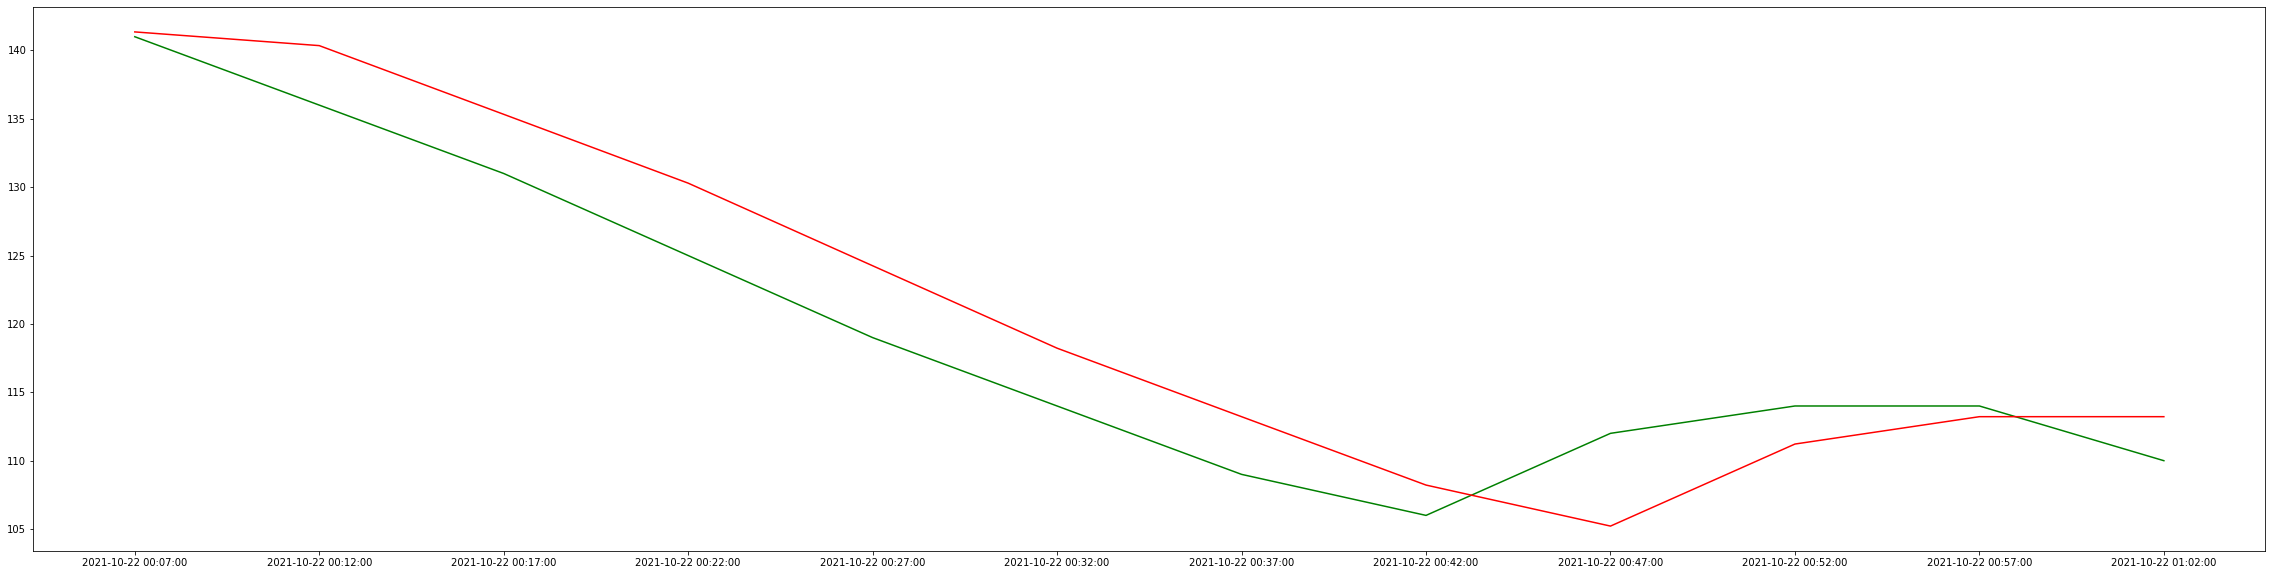

In [73]:
fig, plt1= plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(10)
plt1.plot(time, q, color="green")
plt1.plot(time, pred, color="red")

In [74]:
import os
path = "/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Test/Date"
count = 0
mmse = 0
mrmse = 0
for file in os.listdir(path):
    if file==".DS_Store":
        continue
    count = count + 1
    full_path = os.path.join(path,file)
    data1 = pd.read_csv(full_path, index_col=0)
    p = data1.iloc[:11, 2]
    q = data1.iloc[1:12, 2]
    time = data1.iloc[1:12, 0]
    predictions = model1.predict(p)
    pred = []
    for i in range(len(predictions)):
        pred.append(predictions[i][0])
    mse = mean_squared_error(pred, q)
    mmse += mse
    mrmse += math.sqrt(mse)

In [75]:
mmse/=count
mrmse/=count

print("Performance for 60 min prediction window: ")
print("Average mean squared error: ", mmse)
print("Average root mean squared error: ", mrmse)

Performance for 60 min prediction window: 
Average mean squared error:  10.628844986232782
Average root mean squared error:  2.881842135437121
